# Анализ продаж игр

**Цель исследования:** Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

**Ход исследования:** Данные берем из файла games.csv

В котором сожержатьс данные до 2016 года. Представим, что сейчас декабрь 2016 г., и мы планируем кампанию на 2017-й. Нужно отработать принцип работы с данными.

**Этапы исследования:**

- Шаг 1. Открыть файл с данными и изучить общую информацию;
- Шаг 2. Подготовить данные;
- Шаг 3. Провести исследовательский анализ данных;
- Шаг 4. Составить портрет пользователя каждого региона;
- Шаг 5. Проверить гипотезы;
- Шаг 6. Написать общий вывод.

**Описание данных:**

- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

In [5]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

## Шаг 1. Открыть файл с данными и изучить общую информацию

In [6]:
# Загружаем файл
pth1 = '/games.csv'

if os.path.exists(pth1):
    games = pd.read_csv(pth1)
else:
    print('Что-то не так с файлом. Проверь файл с данными.')

In [8]:
# Выведем таблицу и общую информацию
games.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [9]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


По таблице с общей информацией видим, что в некоторых столбцах есть пропуски. Поэтому посмотрим на процентное соотношение.
При этом видим что у столбца User_Score стоит тип данных текстовый, хотя в столбце находятся оценки пользоватлей и логичнее было  бы изменить тип данных на float64. Так же смущает ощенка критиков, если посмотреть на Critic_Score и User_Score то в первом случае оценки измеряются в сотнях единиц, а во втором в десятках.

In [10]:
# Проверим процент пропусков по столбцам
na = games.isna().sum().sort_values()
na_perc = round(games.isna().mean()*100,2).sort_values()
display(pd.DataFrame({'Количество пропусков':na,'% пропусков':na_perc}).style.format('{:.2f}').background_gradient('coolwarm'))

,Количество пропусков,% пропусков
Platform,0.00,0.00
NA_sales,0.00,0.00
EU_sales,0.00,0.00
JP_sales,0.00,0.00
Other_sales,0.00,0.00
Name,2.00,0.01
Genre,2.00,0.01
Year_of_Release,269.00,1.61
User_Score,6701.00,40.09
Rating,6766.00,40.48


Видим что больше всего пропусков столбцах: Critic_Score, Rating и User_Score

In [11]:
# Теперь проверим таблицу на явные дубликаты
print("Количество явных дубликатов в таблице:", games.duplicated().sum())

Количество явных дубликатов в таблице: 0


Явных дубликатов в таблице нет.

In [12]:
# Проверим не явные дубликаты по названию, платформе и году релиза
games[games.duplicated(subset = ['Name', 'Platform', 'Year_of_Release'], keep = False)]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.00,0.23,83.0,5.5,E
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN
16230,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.00,0.00,83.0,5.5,E


In [13]:
# После чего дубликаты удалим
games = games.drop_duplicates(subset=['Name', 'Platform', 'Year_of_Release'], keep=False)

In [14]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16711 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16711 non-null  object 
 1   Platform         16711 non-null  object 
 2   Year_of_Release  16442 non-null  float64
 3   Genre            16711 non-null  object 
 4   NA_sales         16711 non-null  float64
 5   EU_sales         16711 non-null  float64
 6   JP_sales         16711 non-null  float64
 7   Other_sales      16711 non-null  float64
 8   Critic_Score     8135 non-null   float64
 9   User_Score       10012 non-null  object 
 10  Rating           9947 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


**Вывод:**
- Явных дубликатов в таблице нет;
- Неявные удалили из таблицы;
- Больше всего пропусков столбцах: Critic_Score, Rating и User_Score;
- У столбца User_Score стоит тип данных текстовый, хотя в столбце находятся оценки пользоватлей и логичнее было бы изменить тип данных на float64

## Шаг 2. Подготовить данные

### Заменим названия столбцов, приведем к нижнему регистру

In [15]:
# Заменим названия столбцов, приведем к неижнему регистру
games.columns = games.columns.str.lower()

In [16]:
games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Преобразуем данные в нужные типы

При попытке приведения столбца user_score к типу float64 столкнулись с тем, что в столбце есть значение 'tbd', кторое не возможно конвертировать во float64. Поэтому давайте проверим сколько таких значений в столбце.

In [17]:
# Сгруппируем данные по оценкам пользователя.
games.groupby(['user_score'])['name'].count()

user_score
0         1
0.2       2
0.3       2
0.5       2
0.6       2
       ... 
9.4      11
9.5       6
9.6       2
9.7       1
tbd    2424
Name: name, Length: 96, dtype: int64

По таблице видим, что около 24% данных имеет значение 'tbd'. И для того чтобу продолжить работу со столбцом заменим значение 'tbd' на NaN, чтобы в дальнейших расчетах эти значения не влияли на итоговый результат.

У обозначения 'tbd' могут быть разные версии интепретации. Но учитывая что данное значение стоит в столбце оценки пользователя, следовательно можем предположить, что данный текс проставляется там где оценки еще нет. Именно поэтому более логично заменить тестовое значение на NaN. Что в итоге позволит провести анализ используя данный столбец.


In [18]:
# Заменим значения 'tbd' на NaN в столбце user_score.
games['user_score'] = games['user_score'].replace('tbd', np.nan)

<ipython-input-18-fbe2bb24f34e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games['user_score'] = games['user_score'].replace('tbd', np.nan)


In [19]:
# Еще раз проверим данные.
games.groupby(['user_score'])['name'].count()

user_score
0       1
0.2     2
0.3     2
0.5     2
0.6     2
       ..
9.3    31
9.4    11
9.5     6
9.6     2
9.7     1
Name: name, Length: 95, dtype: int64

Видим что значения удалось заменить, поэтому перейдем к преобразованию типа данных.

In [20]:
# Преобразуем столбец 'user_score' в float64
games['user_score'] = games['user_score'].astype('float64')

<ipython-input-20-9927207c8758>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games['user_score'] = games['user_score'].astype('float64')


In [21]:
# Проверим тип данных
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16711 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16711 non-null  object 
 1   platform         16711 non-null  object 
 2   year_of_release  16442 non-null  float64
 3   genre            16711 non-null  object 
 4   na_sales         16711 non-null  float64
 5   eu_sales         16711 non-null  float64
 6   jp_sales         16711 non-null  float64
 7   other_sales      16711 non-null  float64
 8   critic_score     8135 non-null   float64
 9   user_score       7588 non-null   float64
 10  rating           9947 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.5+ MB


Данные в толбце user_score преобразованы в тип float64.

### Обработаем пропуски

Больше всего пропусков, как мы уже видели, в столбцах с оценкой критиков, пользователей и возрастном рейтинге игры. Наличие пропусков можно обосновать тем что по отдельным играм еще нет оценок. Аналогично может и не быть возрастного ограничения.

In [22]:
# Еще раз выведем таблицу
games.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Видим что все пропуски в столбцах с оценкой пользователей, критиков и рейтинге игры имеют значения NaN. Для того чтобы не исказить результаты исследования пропуски в этих столбцах удалаять не будем. К тому же в расчетах NaN не будет использоваться.

Так же пропуски у нас есть в столбце year_of_release. И данные пропуски нам будут мешать при анализе данных. Поэтому эти строки мы удалим, так как их всего 2% и на результат это не повляет.

In [25]:
# Удалим пропуски в столце year_of_release
games = games.dropna(subset=['year_of_release'])

In [26]:
# Проверим результат
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16442 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16442 non-null  object 
 1   platform         16442 non-null  object 
 2   year_of_release  16442 non-null  float64
 3   genre            16442 non-null  object 
 4   na_sales         16442 non-null  float64
 5   eu_sales         16442 non-null  float64
 6   jp_sales         16442 non-null  float64
 7   other_sales      16442 non-null  float64
 8   critic_score     7981 non-null   float64
 9   user_score       7461 non-null   float64
 10  rating           9766 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.5+ MB


Видим что удаление прошло успешно.

### Посчитаем суммарные продажи по всем регионам

In [27]:
# Перед добавлением столбца с суммой по проджам, посмотрим на продажи по регионам
sums = games[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=0)
sums

na_sales       4339.31
eu_sales       2399.45
jp_sales       1290.64
other_sales     782.40
dtype: float64

In [28]:
# Добавим новый столбец
games.loc[:, 'total_sales'] = games[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

In [29]:
games.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,30.26
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,28.31


Видим что столбец успешно добавлен и можно двигаться дальше.

В результате предобработки:
- преобразовали названия столбцов в нижний регистр;
- столбец с оценками пользователя преобразовали в формат float64( убрав из него значения 'tbd');
- удалили пропуски;
- добавили столбце суммарных продаж.

## Шаг 3. Провести исследовательский анализ данных

### Сколько игр выпускалось в разные годы

<ipython-input-30-620444e7d136>:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('viridis', len(years_game['years']))(range(len(years_game['years'])))


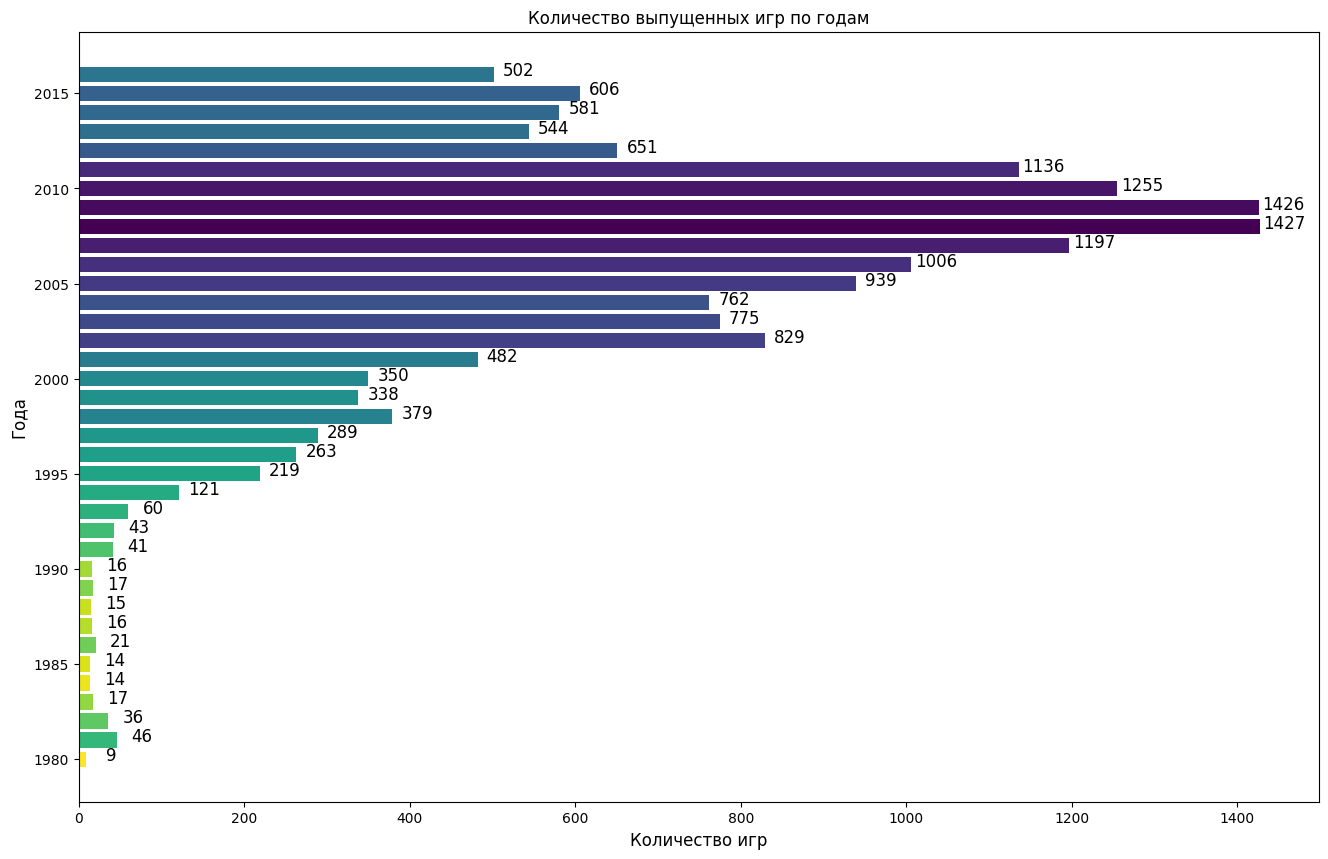

In [30]:
# Отобразим данные по годам на диаграмме.
years_game = pd.DataFrame({'years': games['year_of_release'].sort_values().unique().tolist(),
                 'count': games.groupby('year_of_release')['name'].count().tolist()})
years_game.sort_values('count', inplace=True, ascending = False)

colors = plt.cm.get_cmap('viridis', len(years_game['years']))(range(len(years_game['years'])))
plt.figure(figsize=(16, 10))

plots = plt.barh(y = years_game['years'],
              width = years_game['count'],
              color = colors)


for bar in plots.patches:
 plt.annotate(format(bar.get_width(), '.0f'),
               (bar.get_width() + 30 ,
               bar.get_y()), ha='center', va='center',
               size=12, xytext=(0, 8),
               textcoords='offset points')


plt.xlabel("Количество игр", size=12)
plt.ylabel("Года", size=12)
plt.title("Количество выпущенных игр по годам")
plt.show()

На гистограмме видно, что с 1980 по 1994 годы количестов игр в год не превышала 100 шт. А вот уже с 1994 года начался рост количества выпускаемых игр. Пик пришолся на 2008-2009 годы, выпущено было 1427 и 1426 шт. соответственно. После чего наметился спад. Поэтому для дальнейшего исследования стоит использовать данные с 1994 по 2015 годы. 2016 год так же исключаем, так как данные могут быть предоставлены не в полном объеме.

In [32]:
# Для дальнейшего использования возьмем только интересующие нас годы
games_1994_2016 = games.loc[(games['year_of_release'] >= 1994)]
games_1994_2016.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN,24.67
11,Mario Kart DS,DS,2005.0,Racing,9.71,7.47,4.13,1.90,91.0,8.6,E,23.21
12,Pokemon Gold/Pokemon Silver,GB,1999.0,Role-Playing,9.00,6.18,7.20,0.71,NaN,NaN,NaN,23.09


### Как менялись продажи по платформам

In [33]:
# Посмотрим на суммарные продажи по платформам
top_10_platforms = games.groupby('platform')['total_sales'].sum().sort_values(ascending =False).head(10)
top_10_platforms

platform
PS2     1233.56
X360     961.24
PS3      928.77
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
Name: total_sales, dtype: float64

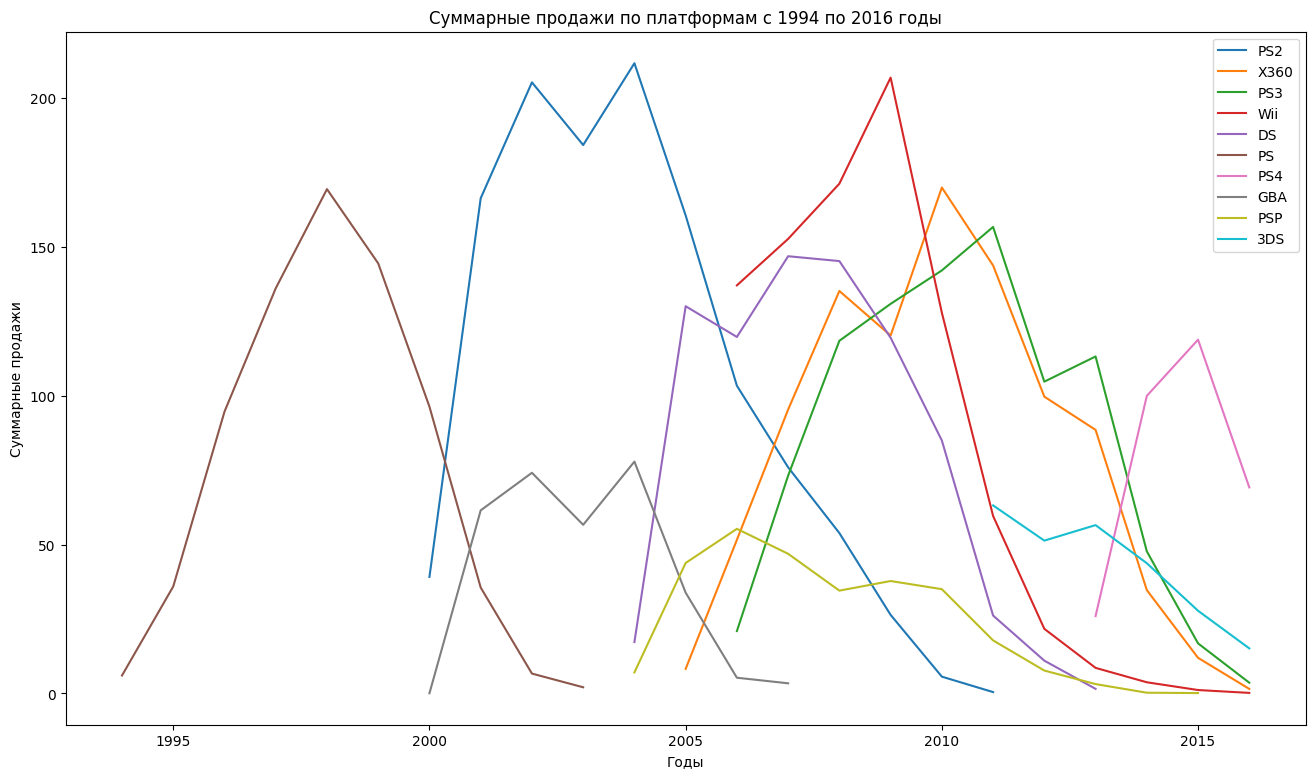

In [34]:
# Соберем дополнительную таблицу для построения графика по платформам.
grouped = games_1994_2016.groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index()
# Отрисуем график
plt.figure(figsize=(16,9))
for platform in top_10_platforms.index:
  df_platform = grouped[grouped['platform'] == platform]
  plt.plot(df_platform['year_of_release'], df_platform['total_sales'], label=platform)
plt.xlabel('Годы')
plt.ylabel('Суммарные продажи')
plt.title('Суммарные продажи по платформам с 1994 по 2016 годы')
plt.legend()
plt.show()

График построен на основании данных за период с 1994 по 2016 годы по топ 10 платформам. После формирования графика видим, что в среднем срок существования платформы в районе 10 лет.

Судя по графику 8 из 10 представленных платфом уже прошло свой 10 летний период, а как следствие и период пиковых продаж. остаются только две платформы которые еще могу показать рост. Это PS4 и 3DS, при том что вторая имеет отрицательную тенденцию по суммайрным продажам. И вероятнее всего роста продаж не покажет.

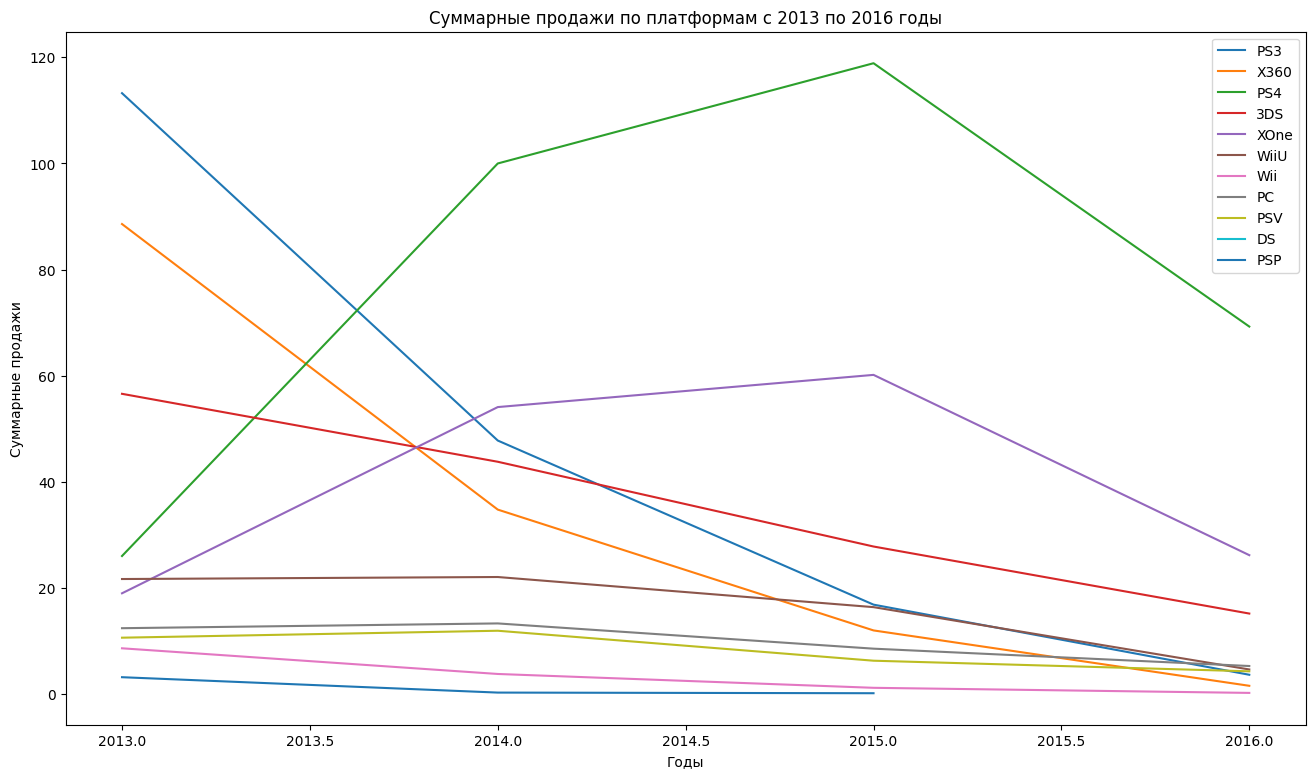

In [35]:
# Для более детального изучения списка платформ проделаем то же упражнение, только за более короткий период
games_2013_2016 = games.loc[(games['year_of_release'] >= 2013)]
# Соберем дополнительную таблицу для построения графика по платформам.
grouped = games_2013_2016.groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index()
# Отрисуем график
plt.figure(figsize=(16,9))
for platform in games_2013_2016['platform'].unique():
  df_platform = grouped[grouped['platform'] == platform]
  plt.plot(df_platform['year_of_release'], df_platform['total_sales'], label=platform)
plt.xlabel('Годы')
plt.ylabel('Суммарные продажи')
plt.title('Суммарные продажи по платформам с 2013 по 2016 годы')
plt.legend()
plt.show()

На основании графика видим что наиболее перспективные PS4 и XOne. Начали старт продаж в 2013, имееют заметную динамику к росту. При этом есть еще три платформы 3DS, WiiU и PSV которые еще не прошли 10 летний период и так же имеет возможность проявить себя в будующем, хотя с меньшей верояностью чем первые две платформы. Так как 4 летний период уже прошел и нет заметной тенденции к росту.

Поэтому если выбирать потенциально прибыльные платформы - это PS4 и XOne.

### "Ящик с усами" по глобавльным продажам.

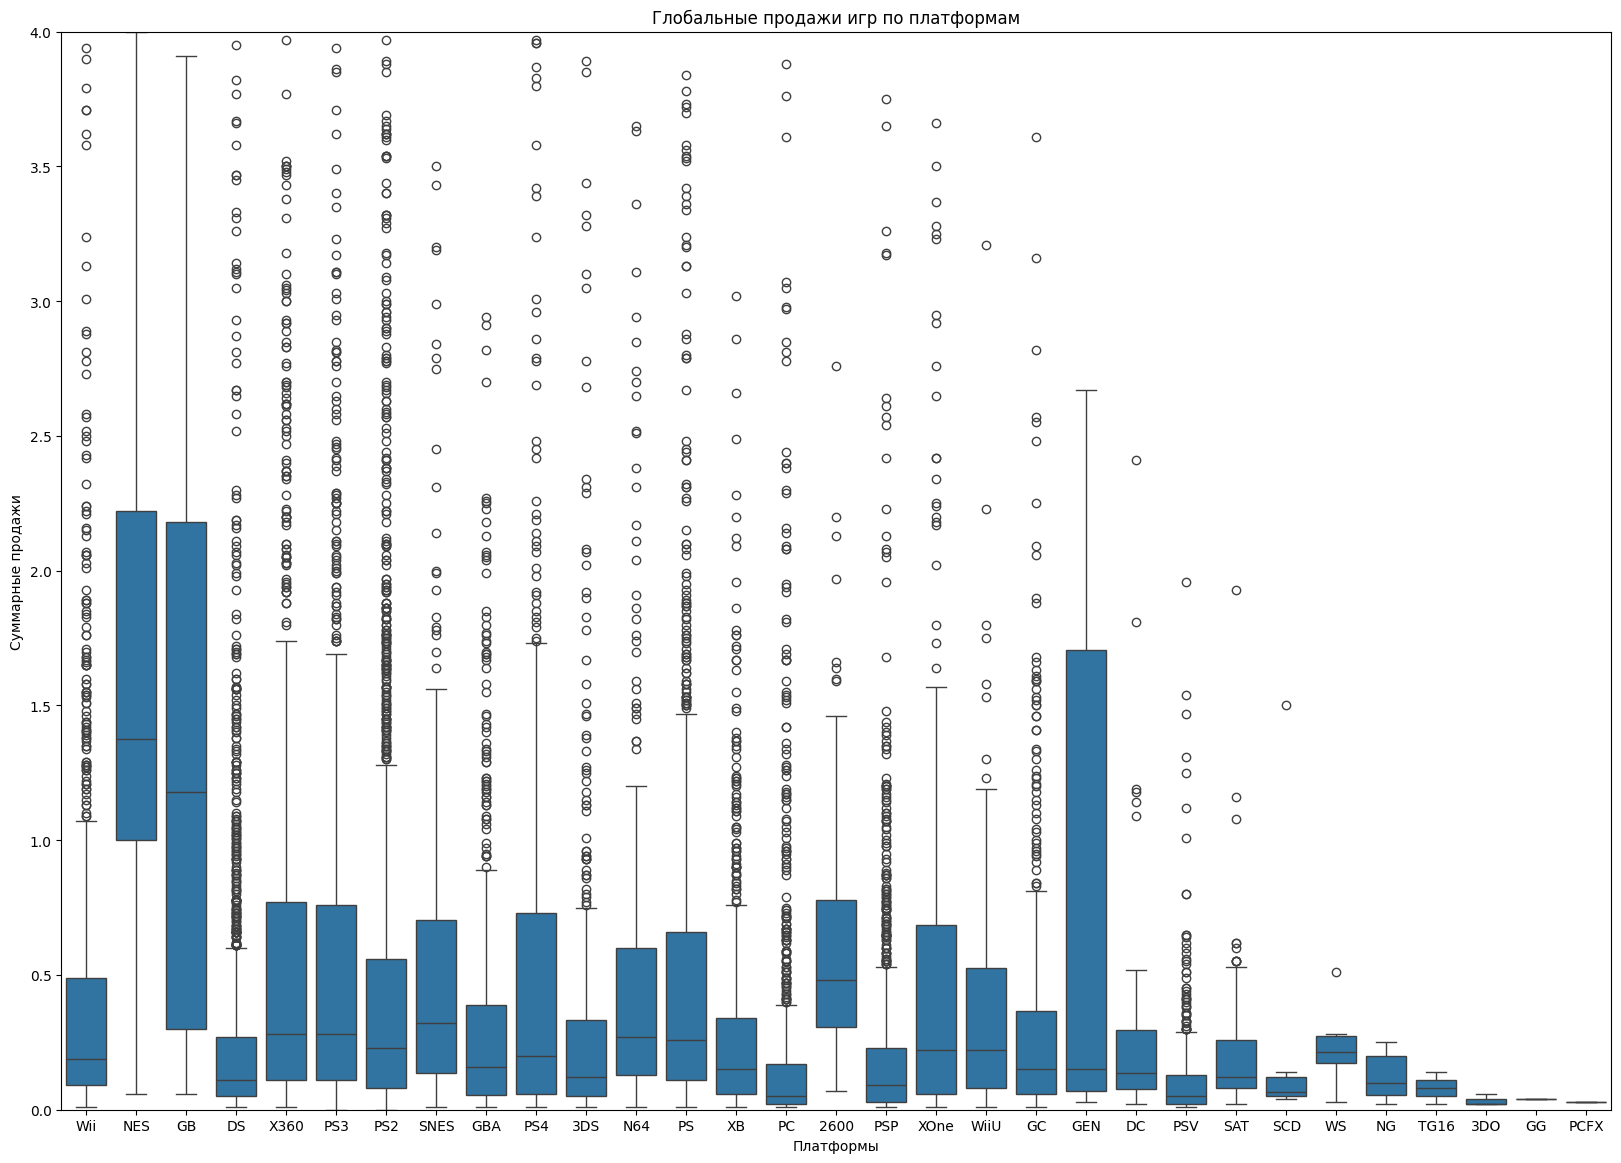

In [36]:
# Построим "Ящик с усами"
plt.figure(figsize=(20,14))
sns.boxplot(x='platform', y='total_sales', data=games)
plt.ylim(0,4)
plt.xlabel('Платформы')
plt.ylabel('Суммарные продажи')
plt.title('Глобальные продажи игр по платформам')
plt.show()

По графику видим что в среднем больше всего было продано игр на трех платформах - NES, GB и GEN, а если смотреть на медиану то остается две лидирующих платформы. При этом все остальные платформы находятся примено на одном уровне по количеству проданных экземпляров,в диапазоне от 0 до 750 тыс.

### Как влияют на продажи отзывы пользователей и критиков

#### PS4

Для примера возьмем наиболее продаваемые платформы. А это PS4 и PS3.

In [37]:
# Посмотрим на суммарные продажи по платформам
top_10_platforms = games_2013_2016.groupby('platform')['total_sales'].sum().sort_values(ascending =False).head(10)
top_10_platforms

platform
PS4     314.14
PS3     181.43
XOne    159.32
3DS     143.25
X360    136.80
WiiU     64.63
PC       39.43
PSV      32.99
Wii      13.66
PSP       3.50
Name: total_sales, dtype: float64

In [38]:
# Чтобы проверить взаимосвязь между оценками и количеством продаж выделим данные по одной платформе
PS4 = games_2013_2016[games_2013_2016['platform'] == 'PS4']

# Вычисляем коэффициент корреляции для оценок пользователя и продажами
ucorr = PS4['user_score'].corr(PS4['total_sales'])
ucorr

-0.031957110204556424

In [39]:
# Аналогично проверим свзь между оценками критиков и продажами
ccorr = PS4['critic_score'].corr(PS4['total_sales'])
ccorr

0.40656790206178095

После подсчета коэффициента корреляции видим что большая зависимость наблюдается между оценками критиков и продажами, чем между оценками пользовталей и продажами. Хотя оба показателя ближе к нулю чем к единице, что говорит о довольно слабой зависимости как таковой.

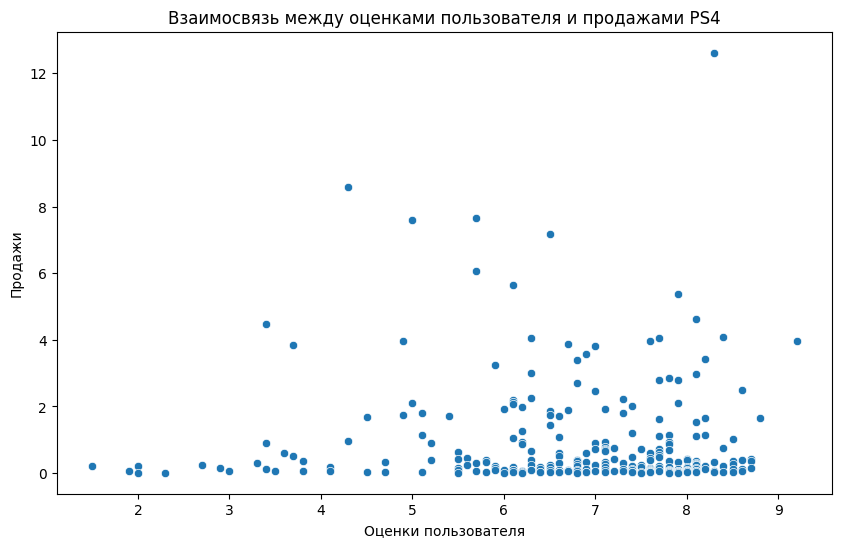

In [40]:
# Построим диаграмму рассеяния для обоих случаев
plt.figure(figsize=(10,6))
sns.scatterplot(x='user_score', y='total_sales', data=PS4)

plt.title('Взаимосвязь между оценками пользователя и продажами PS4')
plt.xlabel('Оценки пользователя')
plt.ylabel('Продажи')
plt.show()

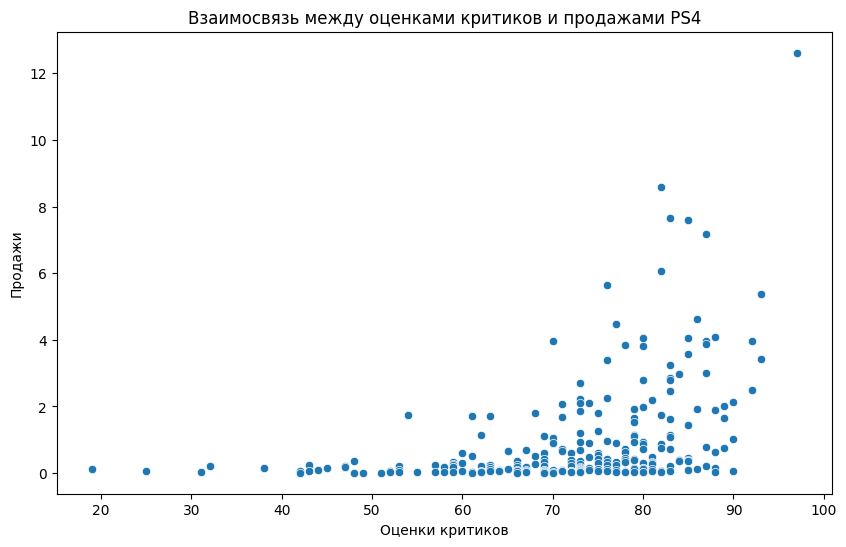

In [41]:
# Аналогично по оценкам критиков
plt.figure(figsize=(10,6))
sns.scatterplot(x='critic_score', y='total_sales', data=PS4)

plt.title('Взаимосвязь между оценками критиков и продажами PS4')
plt.xlabel('Оценки критиков')
plt.ylabel('Продажи')
plt.show()

Графики так же подтверждают, что явно выраженной зависисмости между показателями оценок и продажами нет. При этом влияние оценок критиков на продажи все таки немного выше.

#### PS3

Для проверки проделаем те же действия только для второй платфомы.

In [42]:
# Чтобы проверить взаимосвязь между оценками и количеством продаж выделим данные по одной платформе
PS3 = games_2013_2016[games_2013_2016['platform'] == 'PS3']

# Вычисляем коэффициент корреляции для оценок пользователя и продажами
ucorr = PS3['user_score'].corr(PS3['total_sales'])
ucorr

0.0023944027357566925

In [43]:
# Аналогично проверим свзь между оценками критиков и продажами
ccorr = PS3['critic_score'].corr(PS3['total_sales'])
ccorr

0.3342853393371919

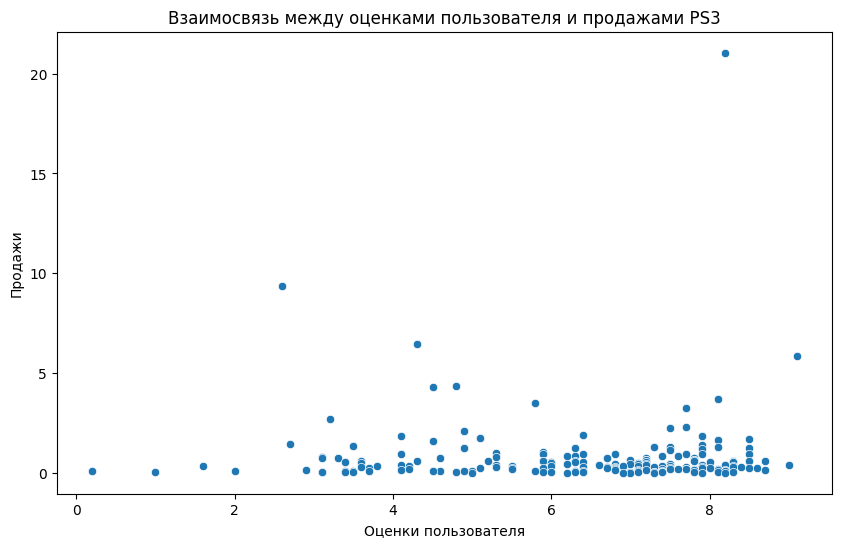

In [44]:
# Построим диаграмму рассеяния для обоих случаев
plt.figure(figsize=(10,6))
sns.scatterplot(x='user_score', y='total_sales', data=PS3)

plt.title('Взаимосвязь между оценками пользователя и продажами PS3')
plt.xlabel('Оценки пользователя')
plt.ylabel('Продажи')
plt.show()

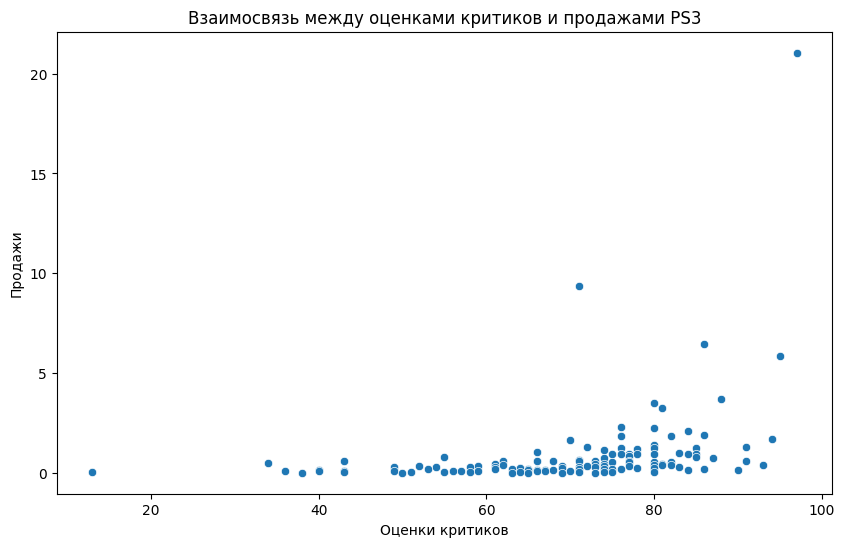

In [45]:
# Аналогично по оценкам критиков
plt.figure(figsize=(10,6))
sns.scatterplot(x='critic_score', y='total_sales', data=PS3)

plt.title('Взаимосвязь между оценками критиков и продажами PS3')
plt.xlabel('Оценки критиков')
plt.ylabel('Продажи')
plt.show()

Видим что для второй платформы ситуация абсолютна та же. Следовательно наши выводы верны.

#### XOne и 3DS

In [46]:
# Для еще двух платформ напишем функцию
def calculate_correlations(df, platforms):
   for platform in platforms:
       platform_df = df[df['platform'] == platform]
       ucorr = platform_df['user_score'].corr(platform_df['total_sales'])
       ccorr = platform_df['critic_score'].corr(platform_df['total_sales'])
       print(f"Платформа: {platform}")
       print(f"Пользователь-продажи: {ucorr}")
       print(f"Критик-продажи: {ccorr}\n")

# И выведем результаты
calculate_correlations(games_2013_2016, ['XOne', '3DS'])

Платформа: XOne
Пользователь-продажи: -0.06892505328279414
Критик-продажи: 0.4169983280084017

Платформа: 3DS
Пользователь-продажи: 0.24150411773563016
Критик-продажи: 0.3570566142288103



Как видим результаты аналогичны двум первым платформам.

#### Все платформы

In [47]:
# Вычисляем коэффициент корреляции для оценок пользователя и продажами по всем платформам
ucorr = games_2013_2016['user_score'].corr(games_2013_2016['total_sales'])
ucorr

-0.0026078133545982727

In [48]:
# Аналогично проверим свзь между оценками критиков и продажами по всем платформам
ccorr = games_2013_2016['critic_score'].corr(games_2013_2016['total_sales'])
ccorr

0.3136995151027369


При этом если проверить коэффициент по всем платформам получим еще более слабые зависимости между показателями оценок и продажами. Хотя при этом соотношение остается тем же, оценки критиков оказывают большее влияние чем оценки пользоватлей.

### Распределение игр по жанрам

In [49]:
# Посмотрим на суммарные продажи по жанрам
genres = games_2013_2016.groupby('genre')['total_sales'].sum().sort_values(ascending =False)
genres

genre
Action          321.87
Shooter         232.98
Sports          150.65
Role-Playing    145.89
Misc             62.82
Platform         42.63
Racing           39.89
Fighting         35.31
Adventure        23.64
Simulation       21.76
Strategy         10.08
Puzzle            3.17
Name: total_sales, dtype: float64

<ipython-input-50-8e04070efd32>:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('viridis', len(genres_game['genres']))(range(len(genres_game['genres'])))


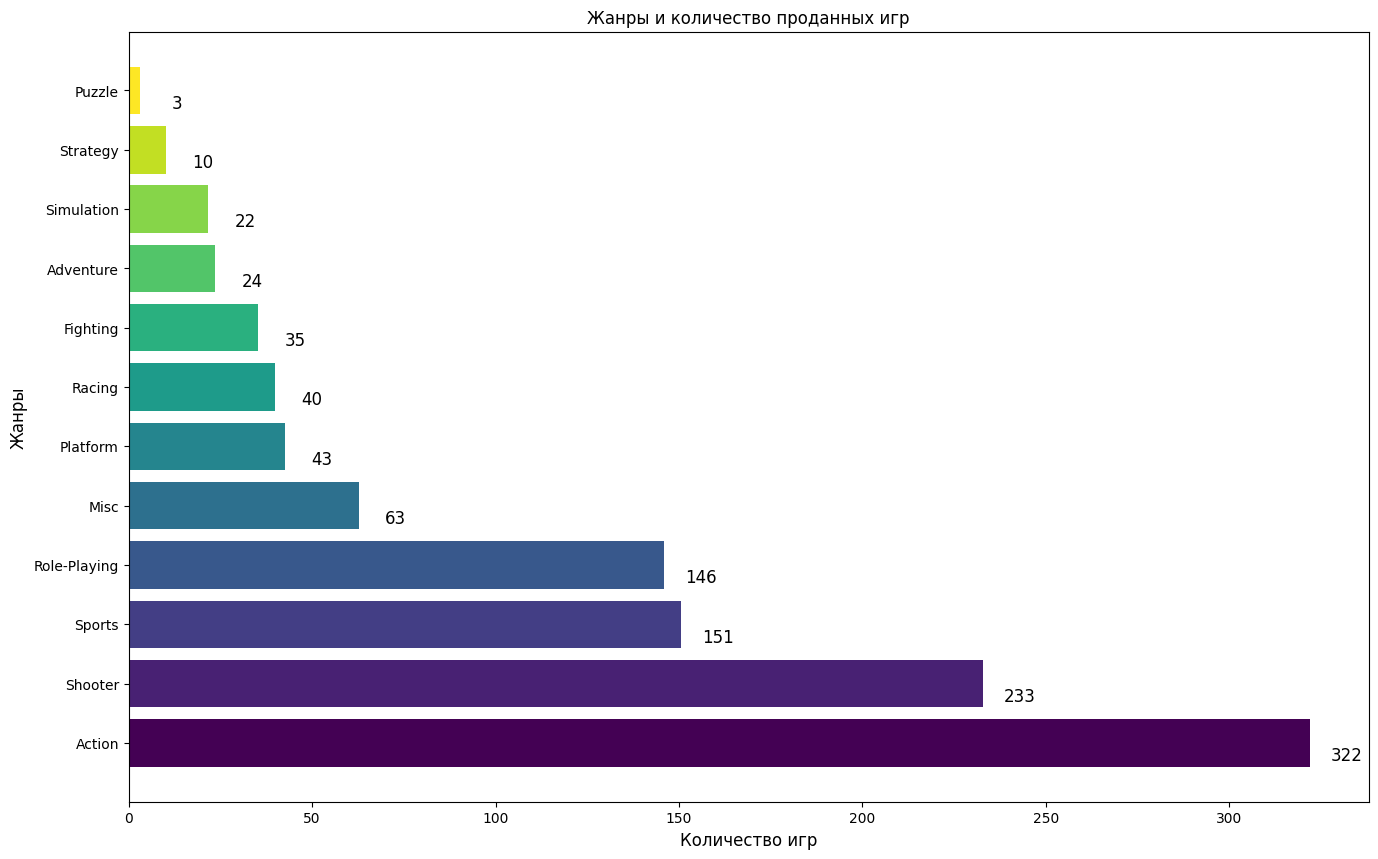

In [50]:
# Отобразим данные по жанрам и сумме продаж.
# Подготовим табицу с жанрами
genres = games_2013_2016['genre'].sort_values().unique().tolist()
# Уберем из нее NaN
genres = [genre for genre in genres if pd.notnull(genre)]
# Соберем датафрейм
genres_game = pd.DataFrame({'genres': genres,
                 'sum': games_2013_2016.groupby('genre')['total_sales'].sum().tolist()})
genres_game.sort_values('sum', inplace=True, ascending = False)

colors = plt.cm.get_cmap('viridis', len(genres_game['genres']))(range(len(genres_game['genres'])))
plt.figure(figsize=(16, 10))

plots = plt.barh(y = genres_game['genres'],
              width = genres_game['sum'],
              color = colors)


for bar in plots.patches:
 plt.annotate(format(bar.get_width(), '.0f'),
               (bar.get_width() + 10 ,
               bar.get_y()), ha='center', va='center',
               size=12, xytext=(0, 8),
               textcoords='offset points')


plt.xlabel("Количество игр", size=12)
plt.ylabel("Жанры", size=12)
plt.title("Жанры и количество проданных игр")
plt.show()

На первом месте по жанрам, со значительным отрываом, находится Action. Затем идут Shooter и Sports. При этом самые не популярные жанры по количетсву проданых экземпляров примерно на одной позиции. И это жанры:  Simulation, Strategy, Puzzle.

In [51]:
# Посмотрим на распределение жанров по регионам
# С помощью pivot_table соберем табличу по количеству проданных игр в каждом жанре и по каждому региону
reg_genres = pd.pivot_table(games_2013_2016,
                            index='genre',
                            values=['na_sales', 'eu_sales', 'jp_sales', 'other_sales'],
                            aggfunc='median')
reg_genres

,eu_sales,jp_sales,na_sales,other_sales
genre,,,,
Action,0.020,0.01,0.020,0.010
Adventure,0.000,0.01,0.000,0.000
Fighting,0.020,0.03,0.045,0.010
Misc,0.010,0.02,0.010,0.000
Platform,0.080,0.00,0.090,0.025
Puzzle,0.000,0.02,0.000,0.000
Racing,0.060,0.00,0.030,0.010
Role-Playing,0.010,0.05,0.020,0.010
Shooter,0.190,0.00,0.200,0.050


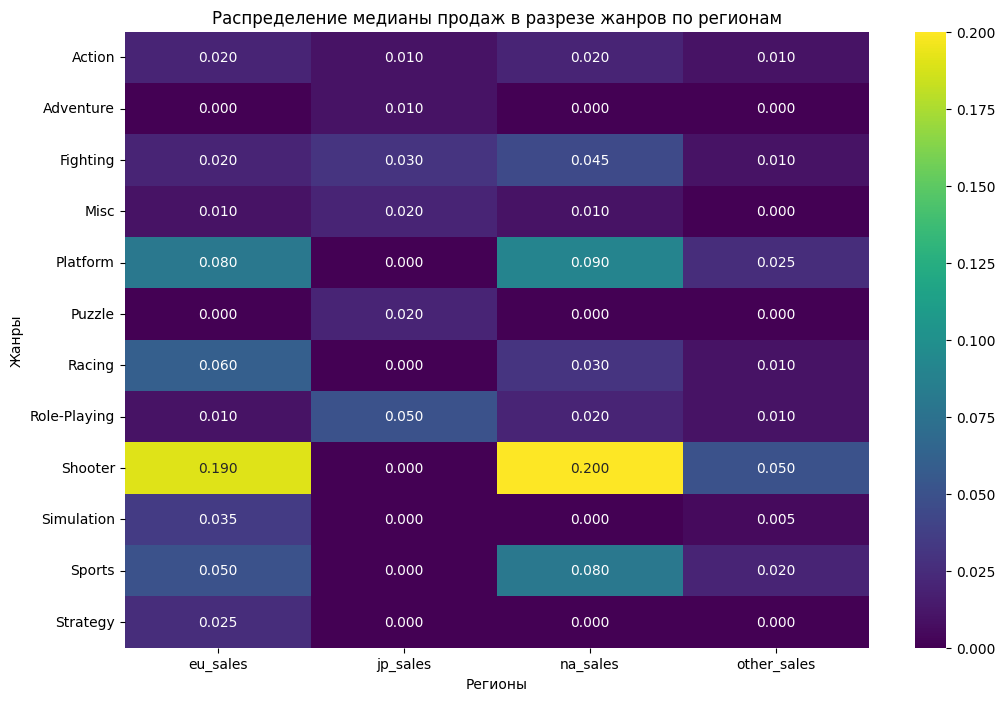

In [52]:
# Для визуализации испольузем heatmap
fig, ax = plt.subplots(figsize=(12, 8))

heatmap = sns.heatmap(reg_genres, annot=True, annot_kws={"size": 10}, fmt='.3f', cmap='viridis')
heatmap.tick_params(axis='both', labelsize=10)

plt.xlabel("Регионы", size=10)
plt.ylabel("Жанры", size=10)
plt.title("Распределение медианы продаж в разрезе жанров по регионам")
plt.show()

По таблице видим, что в регионах NA, EU и Other первое место по жанрам занимает Shooter. А вот в регионе JP на первое место выходит жанр Role-Playing.

## Шаг 4. Составить портрет пользователя каждого региона

### Самые популярные платформы

In [53]:
# С помощью pivot_table соберем таблицу по количеству проданных игр в каждой платформе и по каждому региону
reg_platform = pd.pivot_table(games_2013_2016,
                              index='platform',
                              values=['na_sales', 'eu_sales', 'jp_sales', 'other_sales'],
                              aggfunc='sum')
# После чего выберем топ 5 в каждом из регионов.
top_platforms = reg_platform.apply(lambda x: x.nlargest(5), axis=0)
top_platforms

,eu_sales,jp_sales,na_sales,other_sales
platform,,,,
3DS,30.96,67.81,38.20,6.28
PS3,67.81,23.35,63.50,26.77
PS4,141.09,15.96,108.74,48.35
PSV,NaN,18.59,NaN,NaN
WiiU,NaN,10.88,NaN,NaN
X360,42.52,NaN,81.66,12.11
XOne,51.59,NaN,93.12,14.27


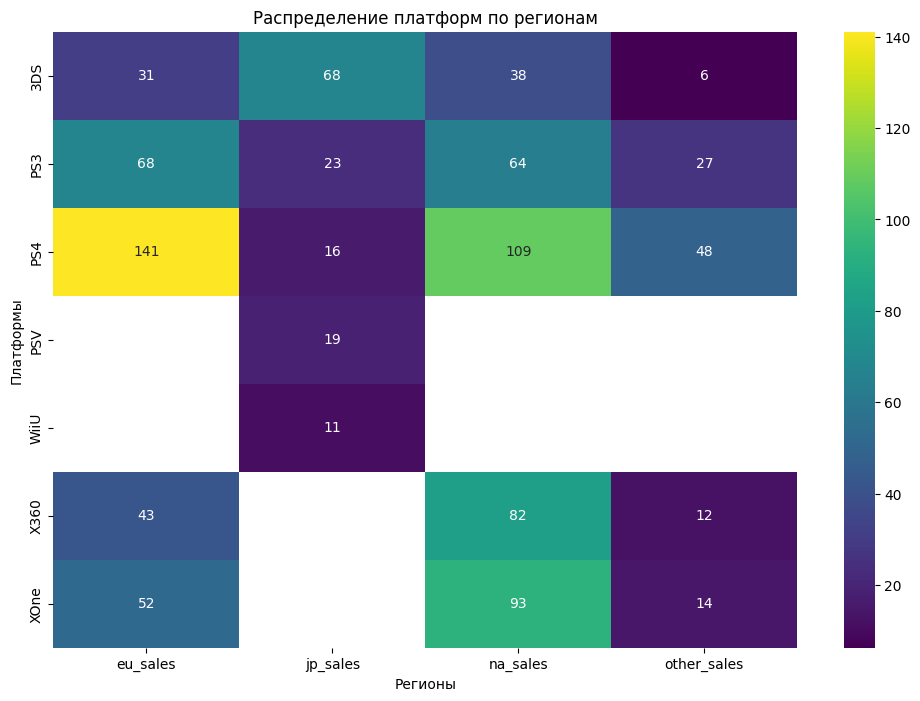

In [54]:
# Для визуализации испольузем heatmap
fig, ax = plt.subplots(figsize=(12, 8))

heatmap = sns.heatmap(top_platforms, annot=True, annot_kws={"size": 10}, fmt='.0f', cmap='viridis')
heatmap.tick_params(axis='both', labelsize=10)

plt.xlabel("Регионы", size=10)
plt.ylabel("Платформы", size=10)
plt.title("Распределение платформ по регионам")
plt.show()

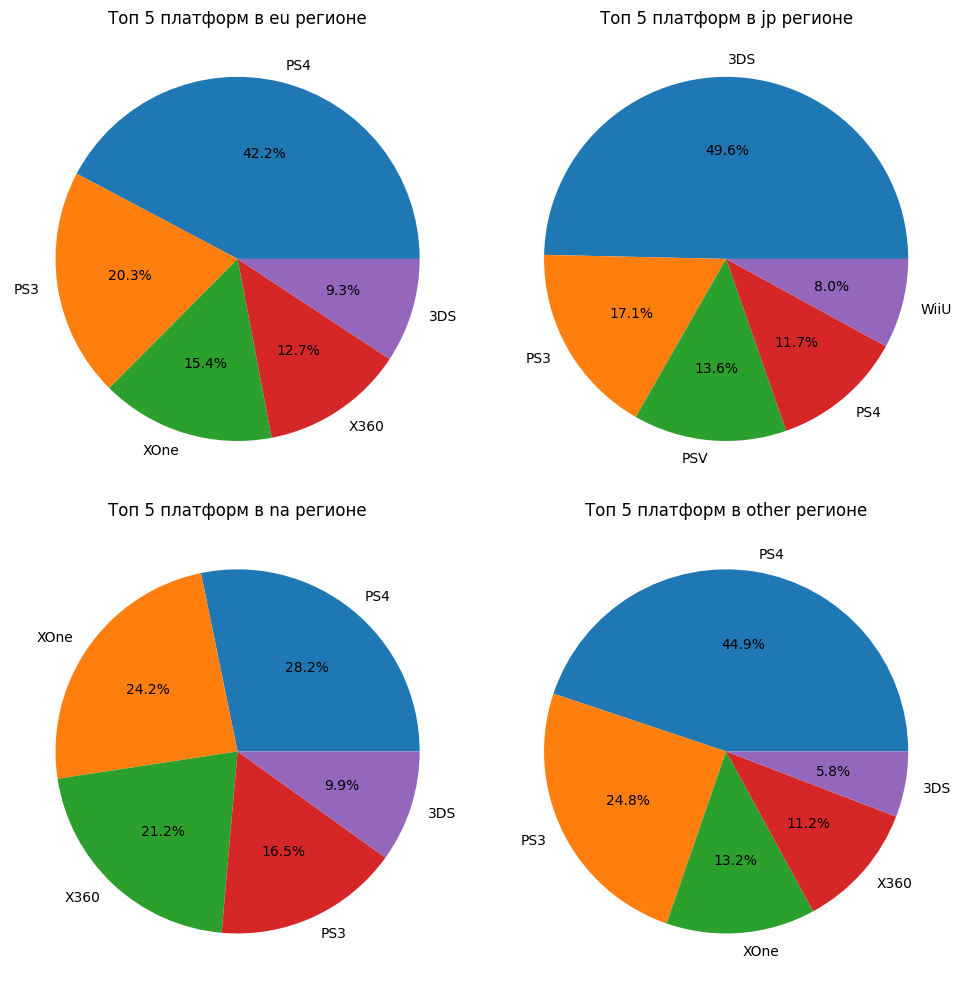

In [61]:
# Отдельно посмотрим на каждый из регионов, для этого напишем функцию
def plot_top_platforms(region, data, ax):
    data[f'{region}_sales'].sort_values(ascending=False).head(5).plot.pie(autopct='%1.1f%%', ax=ax)
    ax.set_title(f"Топ 5 платформ в {region} регионе")
    ax.axis('off')

# Создаем фигуру и оси для двух диаграмм в верхней части
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Используем функцию для построения диаграмм
plot_top_platforms('eu', reg_platform, axs[0, 0])
plot_top_platforms('jp', reg_platform, axs[0, 1])
plot_top_platforms('na', reg_platform, axs[1, 0])
plot_top_platforms('other', reg_platform, axs[1, 1])

# Выводим графики
plt.tight_layout()
plt.show()

В результате мы получили что в регионах eu и other топ платформ один. На первом месте стоит PS4, затем PS3, ХOne, Х360 и 3DS. А вот в остальных регионах топ 5 платформ меняется. В jp регионе на первое место выходит 3DS, а кроме PS3 и PSV в топ так же вошли PS4 и WiiU. А вот в na первые три места заняли PS4, XOne, Х360.

In [62]:
# Так же посмотрим на процентное распределение по платформам
top_platforms = top_platforms.div(top_platforms.sum(axis=1), axis=0).multiply(100).round(2)
top_platforms

,eu_sales,jp_sales,na_sales,other_sales
platform,,,,
3DS,21.61,47.34,26.67,4.38
PS3,37.38,12.87,35.00,14.76
PS4,44.91,5.08,34.62,15.39
PSV,NaN,100.00,NaN,NaN
WiiU,NaN,100.00,NaN,NaN
X360,31.20,NaN,59.92,8.89
XOne,32.45,NaN,58.57,8.98


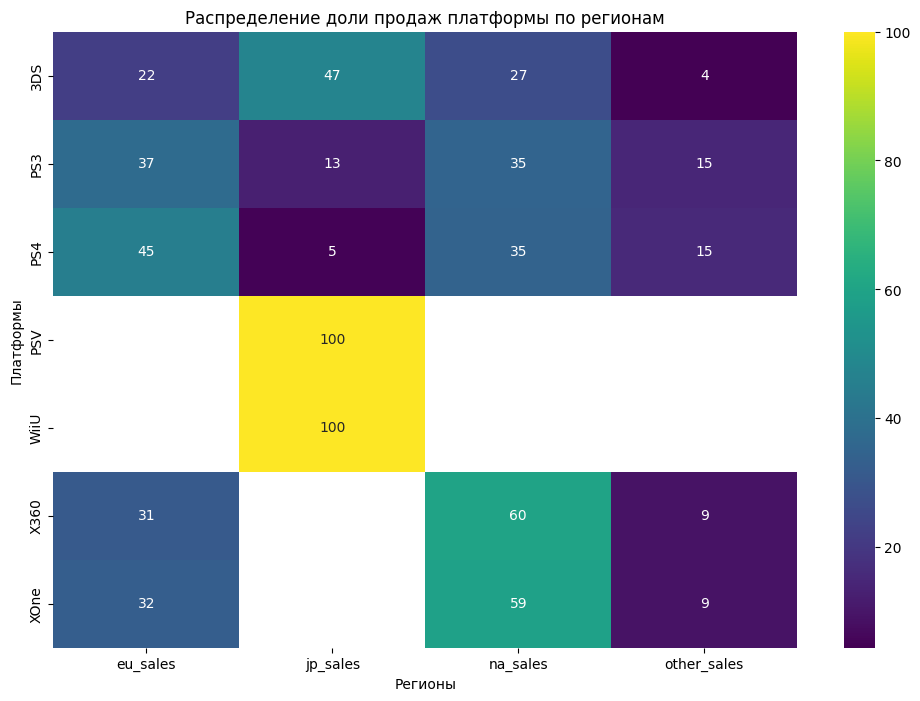

In [63]:
# Для визуализации испольузем heatmap
fig, ax = plt.subplots(figsize=(12, 8))

heatmap = sns.heatmap(top_platforms, annot=True, annot_kws={"size": 10}, fmt='.0f', cmap='viridis')
heatmap.tick_params(axis='both', labelsize=10)

plt.xlabel("Регионы", size=10)
plt.ylabel("Платформы", size=10)
plt.title("Распределение доли продаж платформы по регионам")
plt.show()

В результате можно сказать что такие платформы как WiiU и PSV представлены только в jp регионе и занимают 100% доли по продажам. А вот по остальным платформам из топ 5 больше всего продаж было в na регионе по платформам XOne, Х360. Для регионов eu и other в топе PS4 и PS3.

### Самые популярные жанры

In [64]:
# Породелаем те же манипуляции для жанров
reg_genres = pd.pivot_table(games_2013_2016,
                            index='genre',
                            values=['na_sales', 'eu_sales', 'jp_sales', 'other_sales'],
                            aggfunc='sum')
# После чего выберем топ 5 в каждом из регионов.
top_genres = reg_genres.apply(lambda x: x.nlargest(5), axis=0)
top_genres

,eu_sales,jp_sales,na_sales,other_sales
genre,,,,
Action,118.13,40.49,126.05,37.20
Fighting,NaN,7.65,NaN,NaN
Misc,NaN,9.20,27.49,6.09
Racing,20.19,NaN,NaN,NaN
Role-Playing,36.97,51.04,46.40,11.48
Shooter,87.86,6.61,109.74,28.77
Sports,60.52,NaN,65.27,19.45


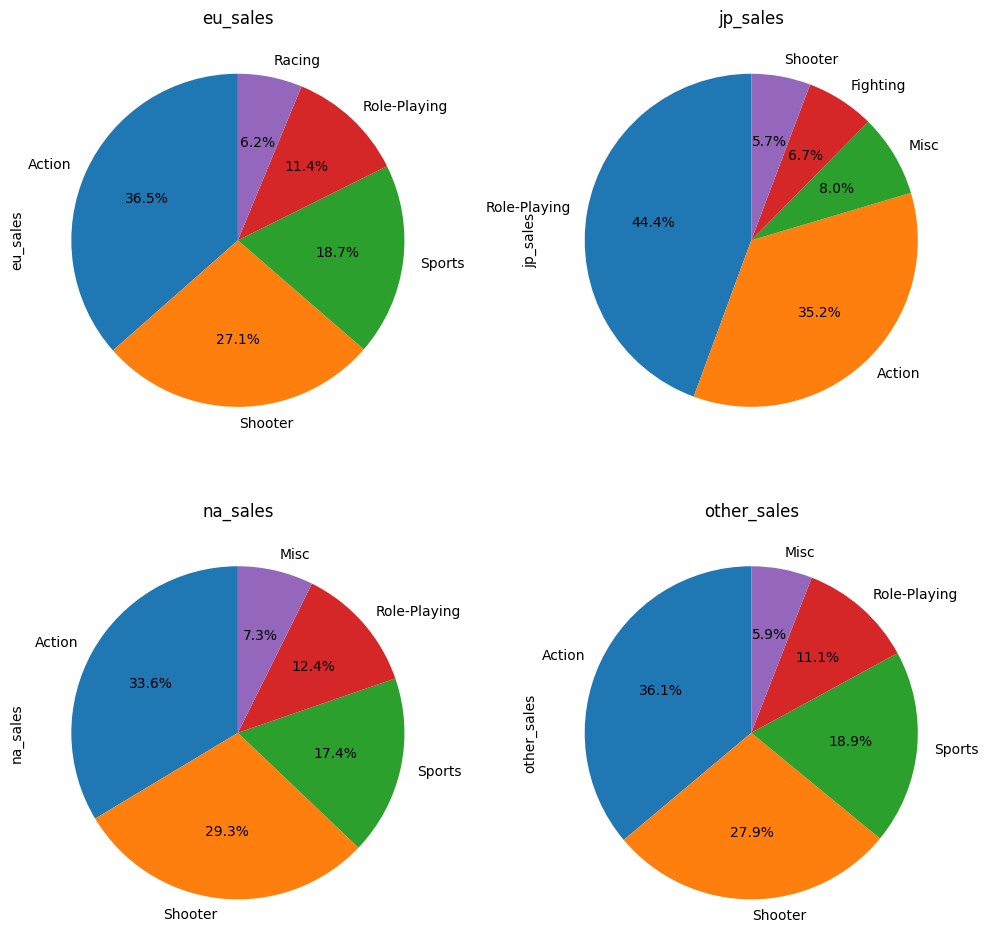

In [65]:
# Создаем круговые диаграммы для каждого столбца
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

for i, column in enumerate(top_genres.columns):
 ax = axs[i//2, i%2]
 # Сортируем значения перед созданием круговой диаграммы
 top_genres[column].dropna().sort_values(ascending=False).plot.pie(ax=ax, autopct='%1.1f%%', startangle=90)
 ax.set_title(column)

plt.tight_layout()
plt.show()

В целом картина сохраняется по регионам. Наибольшее количество продаж было в na регионе, затем идет eu, jp и other.
Во всех регионах распределение по топ 3 жанрам одинаковое, кроме jp. Первые три места занимают: Action, Shooter и Sports. А вот в регионе jp на первое место выходит Role-Playing.
По всей видимости регионы na, eu и other похожи в своих предпочтениям по жанрам, о чем говорят цифры. А вот jp регион отличается своими предпочтениями, что сказалось на топе жанров.

### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [66]:
# Чтобы посмотреть на взаимосвязь рейтинга и количества проданных копий воспользуемся методом get_dummies()
# С его помощью приведем текстовые значения к числовым
games_encoded = pd.get_dummies(games, columns=['rating'])

In [67]:
games_encoded.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'total_sales',
       'rating_AO', 'rating_E', 'rating_E10+', 'rating_EC', 'rating_K-A',
       'rating_M', 'rating_RP', 'rating_T'],
      dtype='object')

In [68]:
# Затем уберем не нужные нам столбцы
games_encoded = games_encoded.drop(columns=['name',
                                            'platform',
                                            'year_of_release',
                                            'genre',
                                            'critic_score',
                                            'user_score',
                                            'total_sales'])

In [69]:
# Создадим итоговый датафрейм
correlations_df = pd.DataFrame()

# В наш датафрейм положим искомые значения
for region in ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']:
   correlations = games_encoded.corrwith(games_encoded[region])
   correlations_df[region] = correlations

correlations_df

,na_sales,eu_sales,jp_sales,other_sales
na_sales,1.000000,0.766644,0.451265,0.638462
eu_sales,0.766644,1.000000,0.435895,0.722691
jp_sales,0.451265,0.435895,1.000000,0.291583
other_sales,0.638462,0.722691,0.291583,1.000000
rating_AO,0.009494,0.007142,-0.001968,0.001759
rating_E,0.041491,0.037106,-0.050318,0.034032
rating_E10+,-0.005908,-0.008593,-0.048543,0.006556
rating_EC,-0.001959,-0.005755,-0.005567,-0.003971
rating_K-A,0.009731,-0.001491,0.017724,-0.002701
rating_M,0.086202,0.105517,-0.038284,0.114461


В резульате видим, что явной зависимости между рейтингом и пколичеством продаж нет. При этом стоит отметить что наибольшее влияние из всех значений рейтинга имеет рейтинг M. Особенно в регионах other, jp и na.

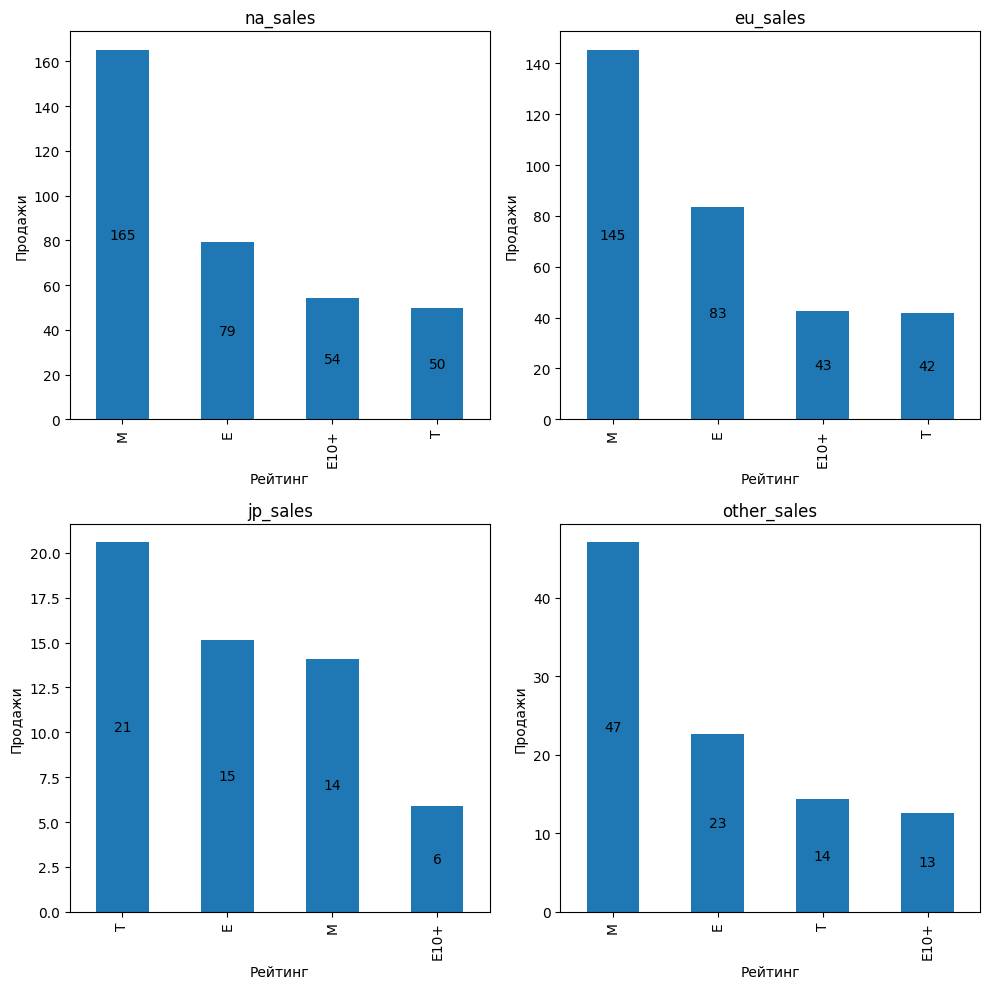

In [71]:
# Для построение графиков напишем функцию
def plot_sales_by_rating(df, regions):
   fig, axs = plt.subplots(2, 2, figsize=(10, 10))

   for i, region in enumerate(regions):
       ax = axs[i//2, i%2]
       # Сгруппируем данные по рейтингу и суммируем продажи в регионе
       grouped = df.groupby('rating')[region].sum()
       # Отсортируем значения перед созданием столбчатой диаграммы
       bars = grouped.sort_values(ascending=False).plot.bar(ax=ax, title=region)

       # Добавляем подписи значений на графики
       for bar in bars.patches:
           width = bar.get_width()
           height = bar.get_height()
           x, y = bar.get_xy()
           ax.text(x + width / 2,
                  y + height / 2,
                  f'{height:.0f}',
                  ha='center',
                  va='center')
       # Добавляем подписи к осям
       ax.set_xlabel('Рейтинг')
       ax.set_ylabel('Продажи')

   plt.tight_layout()
   plt.show()

# Вызовем функцию с нужными нам данными
plot_sales_by_rating(games_2013_2016, ['na_sales', 'eu_sales', 'jp_sales', 'other_sales'])

В результате видим что почти во всех регионах больше всего продаж прихолится на рейтинг М, который по факту и оказывает наибольшее влияние если посмотрет на корреляцию.

## Шаг 5. Проверить гипотезы

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Для проверки гипотез воспользуемся методом из библиотеки scipy. Мы возьмем именно метод ttest_ind, так как он предназначен для проверки гипотезы о равенстве средних двух генеральных совокупностей

scipy.stats.ttest_ind(array1, array2, equal_var, alternative)

При этом у нас будет две гипотезы:

- Нулевая гипотеза: средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
- Альтернативная гипотеза: средние пользовательские рейтинги платформ Xbox On и PC одинаковые разные.

Альфа зададим равным 0.05

alpha = 0.05

In [72]:
games['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [73]:
# Соберем нужные нам датасеты по двум платформам
XOne = games_2013_2016[games_2013_2016['platform'] == 'XOne']
PC = games_2013_2016[games_2013_2016['platform'] == 'PC']

In [74]:
# Посмотрим есть ли пропусти в таблицах
XOne.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 247 entries, 99 to 16672
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             247 non-null    object 
 1   platform         247 non-null    object 
 2   year_of_release  247 non-null    float64
 3   genre            247 non-null    object 
 4   na_sales         247 non-null    float64
 5   eu_sales         247 non-null    float64
 6   jp_sales         247 non-null    float64
 7   other_sales      247 non-null    float64
 8   critic_score     169 non-null    float64
 9   user_score       182 non-null    float64
 10  rating           186 non-null    object 
 11  total_sales      247 non-null    float64
dtypes: float64(8), object(4)
memory usage: 25.1+ KB


In [75]:
PC.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 189 entries, 458 to 16692
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             189 non-null    object 
 1   platform         189 non-null    object 
 2   year_of_release  189 non-null    float64
 3   genre            189 non-null    object 
 4   na_sales         189 non-null    float64
 5   eu_sales         189 non-null    float64
 6   jp_sales         189 non-null    float64
 7   other_sales      189 non-null    float64
 8   critic_score     149 non-null    float64
 9   user_score       155 non-null    float64
 10  rating           140 non-null    object 
 11  total_sales      189 non-null    float64
dtypes: float64(8), object(4)
memory usage: 19.2+ KB


In [76]:
# Уберем пустые значения
XOne = XOne.dropna(subset=['user_score'], how='all')
PC = PC.dropna(subset=['user_score'], how='all')

In [77]:
# Задаём уровень значимости
alpha = 0.05

# Проводим ttest для двух выборок, в качестве альтернативной используем одностороннюю гипотезу «больше»
# Так как выборки разного размера добавим значение equal_var=False
results = st.ttest_ind(XOne['user_score'],
                       PC['user_score'],
                       equal_var=False,
                       alternative='two-sided')

print(f'p-value: {results.pvalue}')

# Проверяем p-value
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: средние пользовательские рейтинги не одинаковые')
else:
    print('Нет оснований отвергнуть нулевую гипотезу: средние пользовательские рейтинги одинаковые')

p-value: 0.14759594013430463
Нет оснований отвергнуть нулевую гипотезу: средние пользовательские рейтинги одинаковые


В результате мы не можем отвергнуть нулевую гипотезу и с большой долей вероятности средние пользовательские рейтинги платформ XOne и PC не имеют статистически значимых отличий.

### Средние пользовательские рейтинги жанров Action и Sports разные.

В данном случае будем ипользовать тот же метод. За исключением проверки альтернативной гипотезы.

scipy.stats.ttest_ind(array1, array2, equal_var)

В данном случае имеем вот такие гипотезы:
- Средние пользовательские рейтинги жанров Action и Sports одинаковые;
- Средние пользовательские рейтинги жанров Action и Sports разные.

Альфа зададим равным 0.05

alpha = 0.05

In [78]:
# Соберем нужные нам датасеты по двум Жанрам
Action = games_2013_2016[games_2013_2016['genre'] == 'Action']
Sports = games_2013_2016[games_2013_2016['genre'] == 'Sports']

In [79]:
# Посмотрим есть ли пропусти в таблицах
Action.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 766 entries, 16 to 16710
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             766 non-null    object 
 1   platform         766 non-null    object 
 2   year_of_release  766 non-null    float64
 3   genre            766 non-null    object 
 4   na_sales         766 non-null    float64
 5   eu_sales         766 non-null    float64
 6   jp_sales         766 non-null    float64
 7   other_sales      766 non-null    float64
 8   critic_score     313 non-null    float64
 9   user_score       389 non-null    float64
 10  rating           419 non-null    object 
 11  total_sales      766 non-null    float64
dtypes: float64(8), object(4)
memory usage: 77.8+ KB


In [80]:
Sports.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 214 entries, 77 to 16643
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             214 non-null    object 
 1   platform         214 non-null    object 
 2   year_of_release  214 non-null    float64
 3   genre            214 non-null    object 
 4   na_sales         214 non-null    float64
 5   eu_sales         214 non-null    float64
 6   jp_sales         214 non-null    float64
 7   other_sales      214 non-null    float64
 8   critic_score     112 non-null    float64
 9   user_score       160 non-null    float64
 10  rating           168 non-null    object 
 11  total_sales      214 non-null    float64
dtypes: float64(8), object(4)
memory usage: 21.7+ KB


In [81]:
# Уберем пустые значения
Action = Action.dropna(subset=['user_score'], how='all')
Sports = Sports.dropna(subset=['user_score'], how='all')

In [82]:
# Задаём уровень значимости
alpha = 0.05

# Проводим ttest для двух выборок
# Так как выборки разного размера добавим значение equal_var=False
results = st.ttest_ind(XOne['user_score'],
                       PC['user_score'],
                       equal_var=False)

print(f'p-value: {results.pvalue}')

# Проверяем p-value
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: cредние пользовательские рейтинги жанров Action и Sports разные')
else:
    print('Нет оснований отвергнуть нулевую гипотезу: cредние пользовательские рейтинги жанров Action и Sports одинаковые')

p-value: 0.14759594013430463
Нет оснований отвергнуть нулевую гипотезу: cредние пользовательские рейтинги жанров Action и Sports одинаковые


В результате не имеем подтверждения гипотезы, что cредние пользовательские рейтинги жанров Action и Sports разные. Так как по резульататм не можем отвергнуть гипотезу что они одинаковые.

## Шаг 6. Написать общий вывод

В целом для исследования подходят данные с 2013 по 2016 годы. А вот с 1980 по 1994 выпуск игр был совершенно незначительным, поэтому этот интервал мы исключаем. Аналогично и 2016 год,так как данные могут быть предоставлены не в полном объеме.

На основе анализа топ 10 платформ за период с 1994 по 2015 годы видим, что в среднем срок существования платформы в районе 10 лет.
И 8 из 10 представленных платфом уже прошло свой 10 летний период, а как следствие и период пиковых продаж. Остаются только две платформы которые еще могу показать рост. Это PS4 и 3DS, при том что вторая имеет отрицательную тенденцию по суммайрным продажам. И вероятнее всего роста продаж не покажет.

При этом если посмотреть разрез за более короткий период с 2013 по 2016 можно выделить как наиболее перспективные PS4 и XOne. Начали старт продаж в 2013, имееют заметную динамику к росту. Так же есть еще три платформы 3DS, WiiU и PSV которые еще не прошли 10 летний период и имеют возможность проявить себя в будующем, хотя с меньшей верояностью чем первые две платформы. Так как 4 летний период уже прошел, но нет заметной тенденции к росту.

Поэтому если выбирать потенциально прибыльные платформы - это PS4 и XOne

При анализе влияния отзывов пользователей и критиков на продажи выявили, что коэффициент корреляции больше между оценками критиков и продажами, чем между оценками пользовталей и продажами. Хотя оба показателя ближе к нулю чем к единице, что говорит о довольно слабой зависимости как таковой. В разрезе всех платформ картина остается той же.

При рассмотрении информации по жанрам. На первом месте, со значительным отрываом, находится Action. Затем идут Shooter и Sports. При этом самые не популярные жанры по количетсву проданых экземпляров примерно на одной позиции. И это жанры: Simulation, Strategy, Puzzle.

Так же видим, что в регионах NA, EU и Other картина по топу игр сохраняется. А вот в регионе JP распределение другое. На первое место выходит жанр Role-Playing.

Что касается платформ. В регионах eu и other топ платформ один. На первом месте стоит PS4, затем PS3, ХOne, Х360 и 3DS. А вот в остальных регионах топ 5 платформ меняется. В jp регионе на первое место выходит 3DS, а кроме PS3 и PSV в топ так же вошли PS4 и WiiU. А вот в na первые три места заняли PS4, XOne, Х360.

В результате можно сказать что такие платформы как WiiU и PSV представлены только в jp регионе и занимают 100% доли по продажам. А вот по остальным платформам из топ 5 больше всего продаж было в na регионе по платформам XOne, Х360. Для регионов eu и other в топе PS4 и PS3.

При рассмотрении взаимосвязи райтинга и прожами видим, что явной зависимости нет. При этом стоит отметить что наибольшее влияние из всех значений рейтинга имеет рейтинг M. Особенно в регионах other, jp и na.

При проверке гипотез первую мы не спомгли опровергнуть. Поэтоум вероятнее всего средние пользовательские рейтинги платформ XOne и PC не имеют статистически значимых отличий. По второй гипотезе так же не имеем подтверждения, аналогично не можем отвергнуть гипотезу что рейтинги одинаковые.